<a href="https://colab.research.google.com/github/katetarasenko/Practical9_Tarasenko/blob/main/Practical9_FIT_4_10_Tarasenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install tensorflow


In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

show pictures from the dataset


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


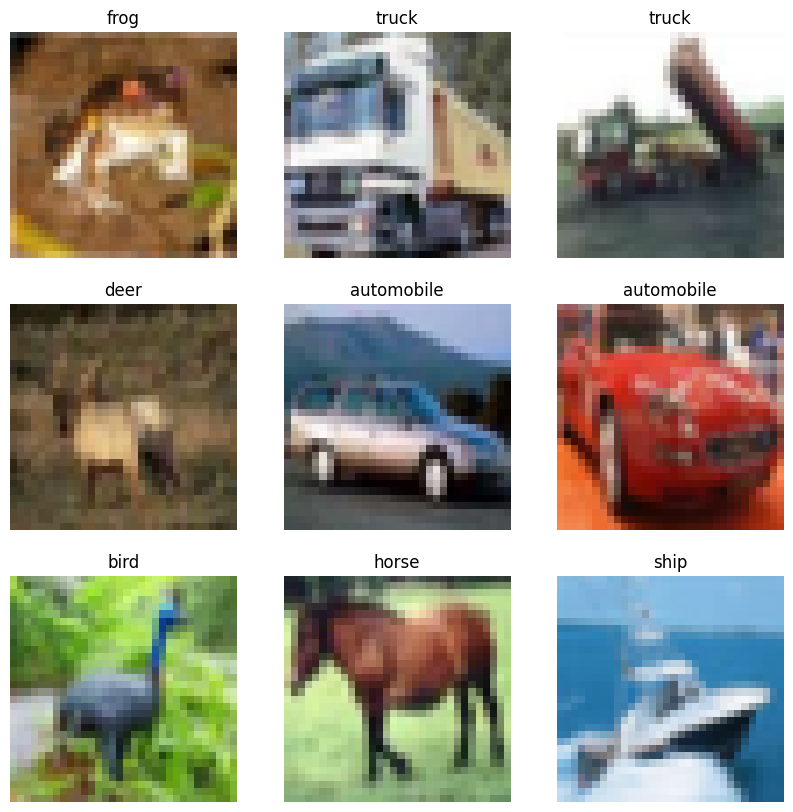

In [46]:
# Check the shape of the data
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

# Visualize some samples
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()


split dataset into training data and validation data

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Check the shape of the data
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


normalize data in the dataset for values of pixels to be between 0 and 1

In [29]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
]

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7794 - loss: 0.6221 - val_accuracy: 0.7120 - val_loss: 0.8761
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.7880 - loss: 0.6038 - val_accuracy: 0.7074 - val_loss: 0.8733
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.7997 - loss: 0.5706 - val_accuracy: 0.7205 - val_loss: 0.8533
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.8119 - loss: 0.5384 - val_accuracy: 0.7146 - val_loss: 0.8818
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8213 - loss: 0.5114 - val_accuracy: 0.7091 - val_loss: 0.9062
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.8248 - loss: 0.4953 - val_accuracy: 0.7163 - val_loss: 0.8896


In [40]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.7204999923706055


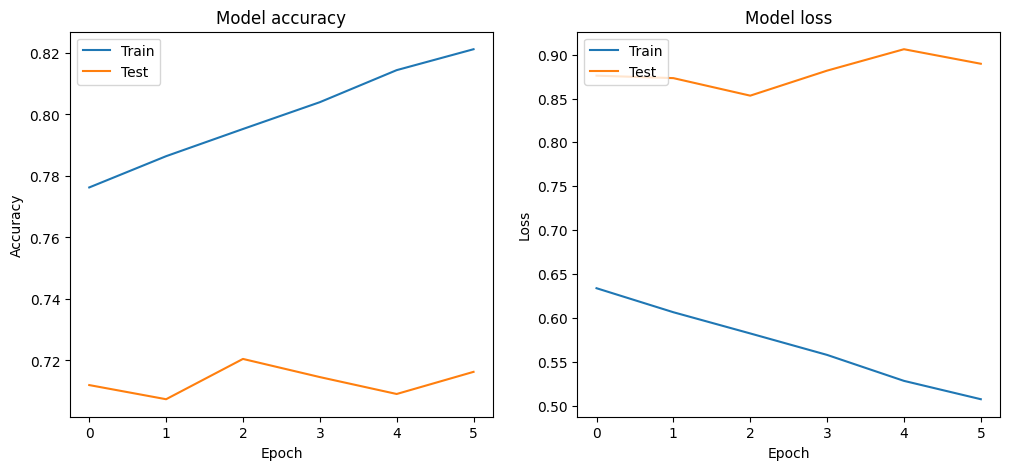

In [41]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [48]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images (scale pixel values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))


for layer in vgg16_base.layers:
    layer.trainable = False


model = Sequential()


model.add(vgg16_base)


model.add(Flatten())

model.add(Dense(256, activation='relu'))


model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Fit the model on the training data
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=10, validation_data=(X_test, y_test))

# Step 8: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 472s 602ms/step - accuracy: 0.3764 - loss: 1.7629 - val_accuracy: 0.5395 - val_loss: 1.3081
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 499s 599ms/step - accuracy: 0.5083 - loss: 1.4001 - val_accuracy: 0.5569 - val_loss: 1.2569
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 469s 599ms/step - accuracy: 0.5297 - loss: 1.3351 - val_accuracy: 0.5720 - val_loss: 1.2067
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 503s 601ms/step - accuracy: 0.5428 - loss: 1.3010 - val_accuracy: 0.5820 - val_loss: 1.1948
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 471s 602ms/step - accuracy: 0.5480 - loss: 1.2960 - val_accuracy: 0.5805 - val_loss: 1.1873
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 500s 600ms/step - accuracy: 0.5552 - loss: 1.2597 - val_accuracy: 0.5842 - val_loss: 1.1859
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 600ms/step - accuracy: 0.5608 - loss: 1.2590 - val_accuracy: 0.5911 - val_loss: 1.1643
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 473s 605ms/step - accuracy: 0.5717 - loss: 1.23

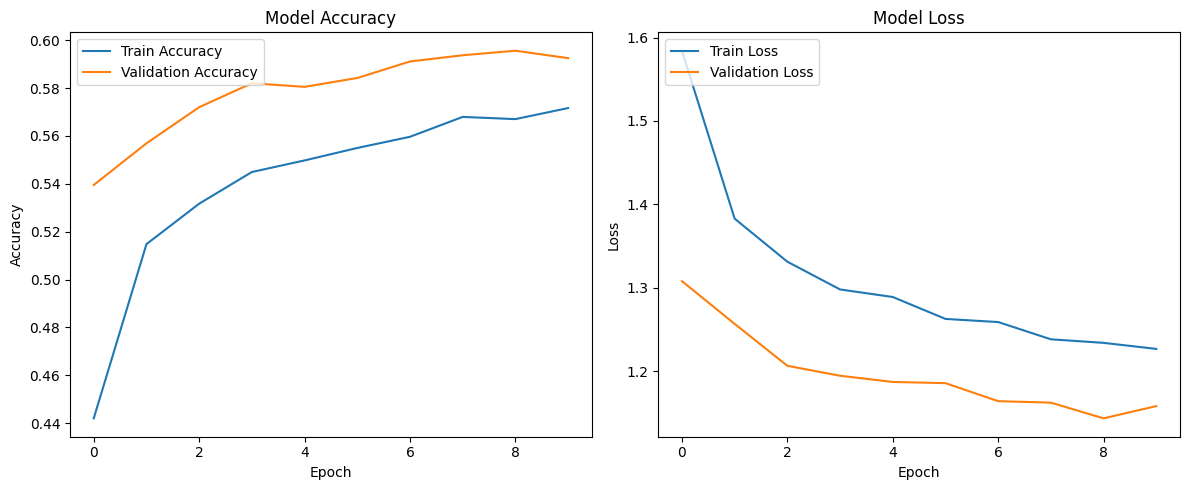

In [49]:
import matplotlib.pyplot as plt

# Assuming 'history' is the returned object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print('Classification Report:')
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 253ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.36      0.78      0.49      1000
  automobile       0.23      0.78      0.35      1000
        bird       0.55      0.16      0.25      1000
         cat       0.32      0.19      0.24      1000
        deer       0.80      0.01      0.02      1000
         dog       0.32      0.31      0.31      1000
        frog       0.61      0.15      0.24      1000
       horse       0.47      0.34      0.40      1000
        ship       0.49      0.32      0.39      1000
       truck       0.38      0.34      0.36      1000

    accuracy                           0.34     10000
   macro avg       0.45      0.34      0.30     10000
weighted avg       0.45      0.34      0.30     10000

